## （1）从一个实例开始

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline



#解决中文显示问题
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import sympy

In [3]:
x = np.linspace(-5, 2, 100)

In [4]:
y1 = x**3 + 5*x**2 + 10

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


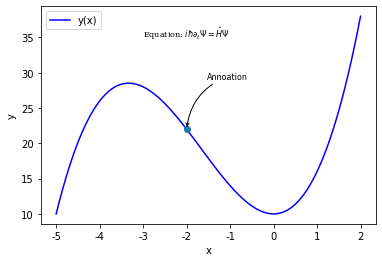

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()


#开始标注 annotation
ax.plot(-2, 22, "o")
ax.annotate(u"Annoation", fontsize=8, 
            family="SimHei",xy=(-2, 22), xycoords="data",xytext=(+20, +50),
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.3"))
#可惜的是没有找到实现中文标注的手段
#原因是标题默认输出英文，如果输出中文，要对字体进行调整。需要在程序定义前输入：






ax.text(-3, 35, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=8, family="serif")

fig.savefig("432189.png", dpi=100, facecolor="#f1f1f1")

#不明原因，不能用右键另存图像

## (2）用figure创建图形

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")

## （3）调节线型和线宽

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


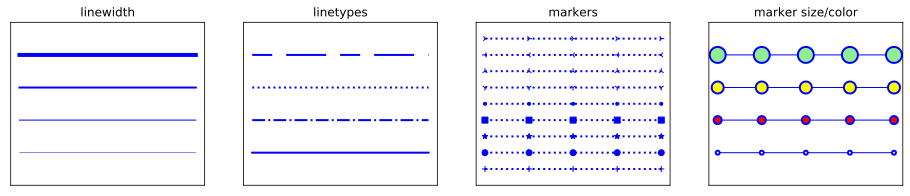

In [7]:


x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
    
fig, axes = plt.subplots(1, 4, figsize=(16,3))

# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
     axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))

 # Line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
     axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
 # custom dash style

line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)


 # marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    # lw = shorthand for linewidth, ls = shorthand for linestyle
    axes[2].plot(x, y + n, color="blue", lw=2, ls='dotted',marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"),  
                    (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-',marker='o', 
                 markersize=markersize,
                 markerfacecolor=markerfacecolor,markeredgewidth=2)

    
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))


上一节介绍的figure对象提供了

matplotlib图形，但所有有趣的内容都在轴内或轴周围组织

实例。在此之前，我们已经遇到过几次Axes对象

章。axes对象是matplotlib库中大多数打印活动的中心。

它提供了坐标系，在其中我们可以绘制数据和数学函数，

此外，它还包含轴对象，这些对象确定轴标签和

放置轴记号。绘制不同类型绘图的功能也是方法

在这个轴类中。在这一节中，我们首先探讨可以绘制的不同类型的情节。

使用轴方法以及如何自定义X和Y轴以及

与轴对象一起使用的坐标系。

In [8]:
# help(plt.Axes.bar)

In [9]:
sym_x = sympy.Symbol("x")

In [10]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

In [11]:
 def sin_expansion(x, n):
          return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).
removeO(), 'numpy')(x) 

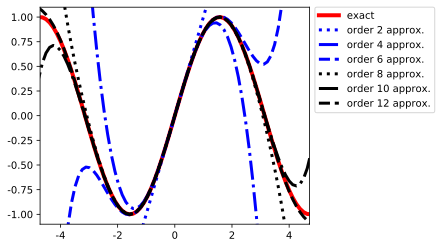

In [12]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linewidth=4, color="red", label='exact')
colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="order %d approx." % (n+1))

    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75)

Text(0.5, 1.0, 'axis labels and title example')

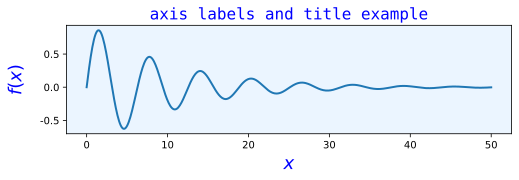

In [39]:
x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-x/10)
fig, ax = plt.subplots(figsize=(8, 2),
                       subplot_kw={'facecolor': "#ebf5ff"})
ax.plot(x, y, lw=2)
ax.set_xlabel ("$x$", labelpad=5, fontsize=18, fontname='DejaVu Sans Mono',
               color="blue")
ax.set_ylabel ("$f(x)$", labelpad=15, fontsize=18, fontname='DejaVu Sans Mono',
               color="blue")
ax.set_title("axis labels and title example", fontsize=16, fontname='DejaVu Sans Mono',
             color="blue")


In [25]:
import matplotlib    
print(matplotlib.matplotlib_fname())

/home/ren/.conda/envs/qutip-env/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [26]:
import matplotlib as plt
plt.get_cachedir()

'/home/ren/.cache/matplotlib'

In [27]:
import matplotlib.pyplot as plt
plt.rc('font',family='DejaVu Sans')

In [40]:
 fig = plt.figure(figsize=(8, 4))

<Figure size 576x288 with 0 Axes>

In [41]:
def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

In [42]:
def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
        

In [43]:
 # main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

In [47]:
 # inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")
ax_insert = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax_insert, x, f, 14)

fig.savefig("greee.png", dpi=100, facecolor="#f1f1f1")

/home/ren/.conda/envs/qutip-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


In [49]:
#没有配置好

import matplotlib.pyplot as plt
import MySQLdb as mdb
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
 
 
def graph():
  # 连接数据库
  conn = mdb.connect(host='127.0.0.1', port=3306, user='root', passwd='2518', db='alibaba_trace', charset='utf8')
 
  # 如果使用事务引擎，可以设置自动提交事务，或者在每次操作完成后手动提交事务conn.commit()
  conn.autocommit(1) # conn.autocommit(True)
 
  # 使用cursor()方法获取操作游标
  cursor = conn.cursor()
  # 因该模块底层其实是调用CAPI的，所以，需要先得到当前指向数据库的指针。
  try:
    cursor.execute("select machineID, count(id) from batch_instance where machineID != 0 group by machineID")
    records = cursor.fetchall()
    list_records = list(records)
 
  except:
    import traceback
    traceback.print_exc()
    # 发生错误时回滚
    conn.rollback()
  finally:
    # 关闭游标连接
    cursor.close()
    # 关闭数据库连接
    conn.close()
 
  res = []
  res[:] = map(list, list_records)
  machineID = [x[0] for x in res]
  instance_num = [x[1] for x in res]
  print(max(instance_num))
  print(min(instance_num))
 
 
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  # # cdf
  # hist, bin_edges = np.histogram(instance_num, bins=len(np.unique(instance_num)))
  # cdf = np.cumsum(hist / sum(hist))
  # ax1.plot(bin_edges[1:], cdf, color='red', ls='-')
  # ax1.set_xlabel("instance number per machine")
  # ax1.set_ylabel("portion of machine")
  # plt.savefig('../../imgs_mysql/cdf_of_machine_instance.png')
 
  # # 直方图
  ax1.hist(instance_num, normed=False, alpha=1.0, bins=100)
  ax1.set_xlabel('instance number per machine')
  ax1.set_ylabel('machine number')
  # cdf 要添加的子图
  axins = inset_axes(ax1, width=1.5, height=1.5, loc='upper left')
  # ax1 大图
  # width height分别为子图的宽和高
  # loc 为子图在大图ax1中的相对位置 相应的值有
  # upper left
  # lower left
  # lower right
  # right
  # center left
  # center right
  # lower center
  # upper center
  # center
  hist, bin_edges = np.histogram(instance_num, bins=len(np.unique(instance_num)))
  cdf = np.cumsum(hist / sum(hist))
  axins.plot(bin_edges[1:], cdf, color='red', ls='-')
  axins.set_yticks([])
  # axins.set_xlabel("instance number per machine")
  # axins.set_ylabel("portion of machine")
 
  plt.savefig("../../imgs_mysql/hist_of_machine_instance")
  plt.show()


ModuleNotFoundError: No module named 'MySQLdb'